In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_path = '/content/drive/MyDrive/NSE-TATAGLOBAL11.csv'
df = pd.read_csv(data_path)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [7]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [8]:
df.duplicated().sum()

0

In [9]:
# Reload the dataframe from the original CSV file
df = pd.read_csv(data_path)

df = df[["Date","Open","High","Low","Close","Total Trade Quantity"]]

df.rename(columns={'Total Trade Quantity' : 'Volume'}, inplace=True)

df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values('Date')

df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1235 non-null   datetime64[ns]
 1   Open    1235 non-null   float64       
 2   High    1235 non-null   float64       
 3   Low     1235 non-null   float64       
 4   Close   1235 non-null   float64       
 5   Volume  1235 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 58.0 KB


In [10]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2013-10-08,157.00,157.80,155.20,155.80,1720413.0
1,2013-10-09,155.70,158.20,154.15,155.55,2049580.0
2,2013-10-10,156.00,160.80,155.85,160.15,3124853.0
3,2013-10-11,161.15,163.45,159.00,160.05,1880046.0
4,2013-10-14,160.85,161.45,157.70,159.45,1281419.0


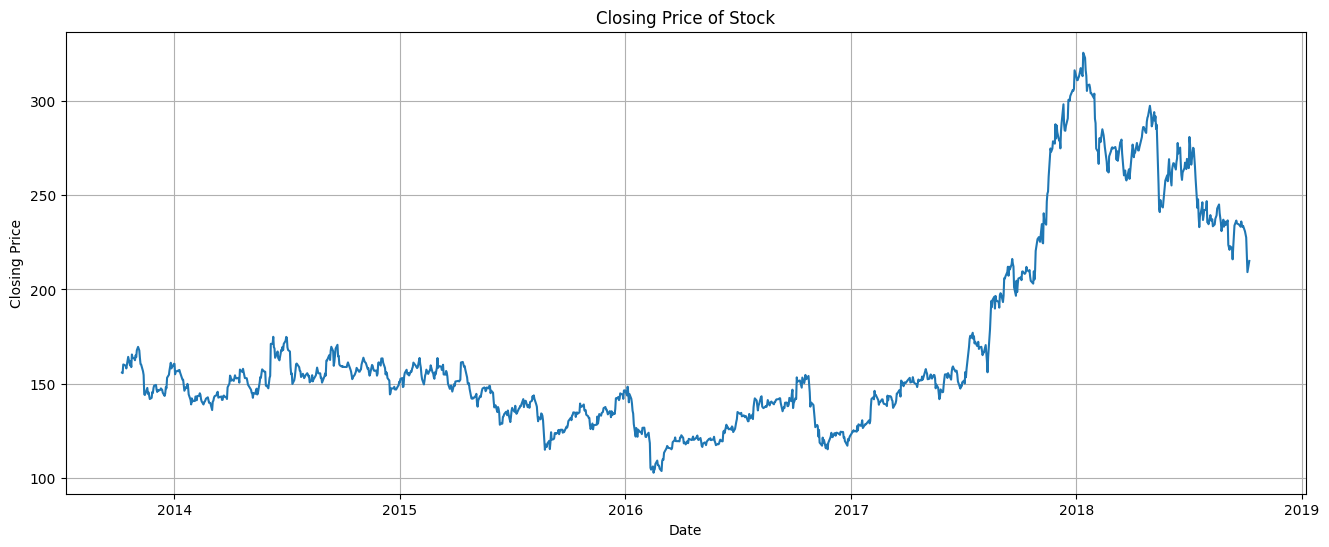

In [11]:
plt.figure(figsize=(16,6))
plt.title("Closing Price of Stock")
plt.plot(df['Date'], df['Close'], data=df)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

In [12]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,1235,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,2016-04-08 15:39:47.368421120,168.954858,171.429069,166.402308,168.731053,2.604151e+06
min,2013-10-08 00:00:00,103.000000,104.600000,100.000000,102.650000,1.001800e+05
25%,2015-01-10 12:00:00,137.550000,138.925000,135.250000,137.225000,1.284482e+06
50%,2016-04-11 00:00:00,151.500000,153.250000,149.500000,151.100000,1.964885e+06
75%,2017-07-10 12:00:00,169.000000,172.325000,166.700000,169.500000,3.095788e+06
max,2018-10-08 00:00:00,327.700000,328.750000,321.650000,325.750000,2.919102e+07
std,NaN,51.499145,52.436761,50.542919,51.544928,2.277028e+06


In [13]:
df['Target'] = df['Close'].shift(-1)
df.dropna(subset=['Target'], inplace=True)


In [14]:
# Simple Moving Average
df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_30'] = df['Close'].rolling(window=30).mean()
df.head(10)

,Date,Open,High,Low,Close,Volume,Target,SMA_7,SMA_30
0,2013-10-08,157.00,157.80,155.20,155.80,1720413.0,155.55,NaN,NaN
1,2013-10-09,155.70,158.20,154.15,155.55,2049580.0,160.15,NaN,NaN
2,2013-10-10,156.00,160.80,155.85,160.15,3124853.0,160.05,NaN,NaN
3,2013-10-11,161.15,163.45,159.00,160.05,1880046.0,159.45,NaN,NaN
4,2013-10-14,160.85,161.45,157.70,159.45,1281419.0,158.05,NaN,NaN
5,2013-10-15,160.00,160.20,155.35,158.05,1145582.0,162.00,NaN,NaN
6,2013-10-17,159.10,162.90,158.25,162.00,2724697.0,164.20,158.721429,NaN
7,2013-10-18,163.20,165.00,162.25,164.20,2540836.0,159.60,159.921429,NaN
8,2013-10-21,164.50,165.35,159.00,159.60,3257249.0,161.85,160.500000,NaN
9,2013-10-22,160.40,162.80,159.90,161.85,1598301.0,158.75,160.742857,NaN


In [15]:
# Exponential Moving Average
df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
df

,Date,Open,High,Low,Close,Volume,Target,SMA_7,SMA_30,EMA
0,2013-10-08,157.00,157.80,155.20,155.80,1720413.0,155.55,NaN,NaN,155.800000
1,2013-10-09,155.70,158.20,154.15,155.55,2049580.0,160.15,NaN,NaN,155.776190
2,2013-10-10,156.00,160.80,155.85,160.15,3124853.0,160.05,NaN,NaN,156.192744
3,2013-10-11,161.15,163.45,159.00,160.05,1880046.0,159.45,NaN,NaN,156.560102
4,2013-10-14,160.85,161.45,157.70,159.45,1281419.0,158.05,NaN,NaN,156.835330
...,...,...,...,...,...,...,...,...,...,...
1229,2018-09-28,234.05,235.95,230.20,233.75,3069914.0,230.90,234.307143,232.683333,232.636333
1230,2018-10-01,234.55,234.60,221.05,230.90,1534749.0,227.60,233.735714,232.461667,232.470968
1231,2018-10-03,230.00,237.50,225.75,227.60,1708590.0,218.20,232.735714,232.070000,232.007066
1232,2018-10-04,223.50,227.80,216.15,218.20,1728786.0,209.20,230.578571,231.243333,230.692107


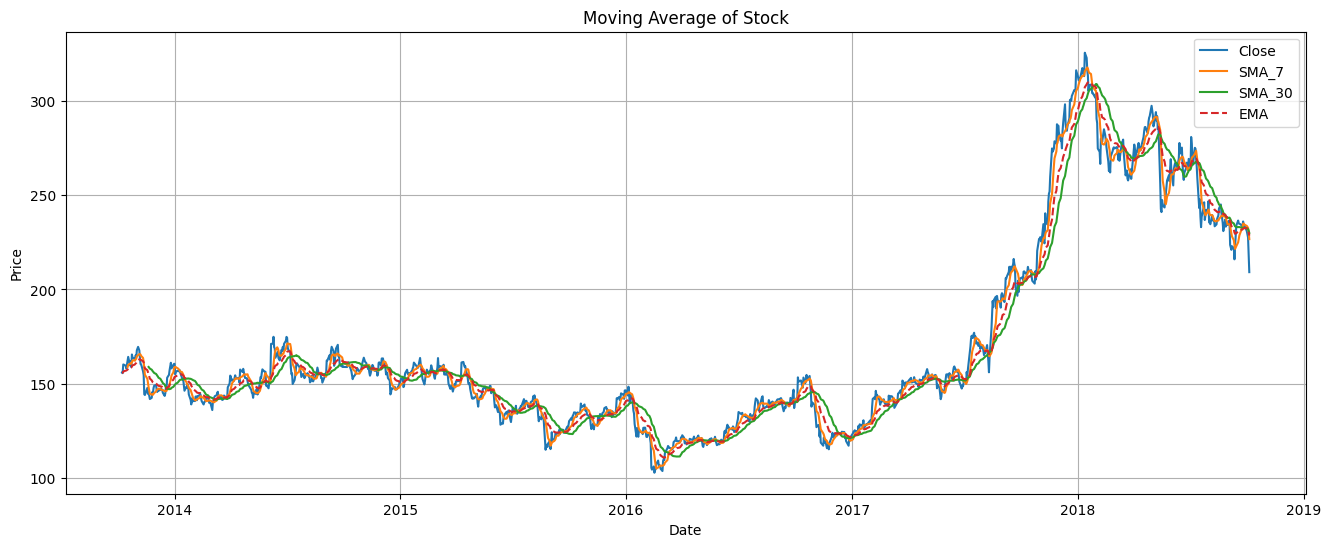

In [16]:
plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['Close'], data=df)
plt.plot(df['Date'], df['SMA_7'], data=df)
plt.plot(df['Date'], df['SMA_30'], data=df)
plt.plot(df['Date'], df['EMA'], data=df,linestyle='--')
plt.title("Moving Average of Stock")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
plt.show()

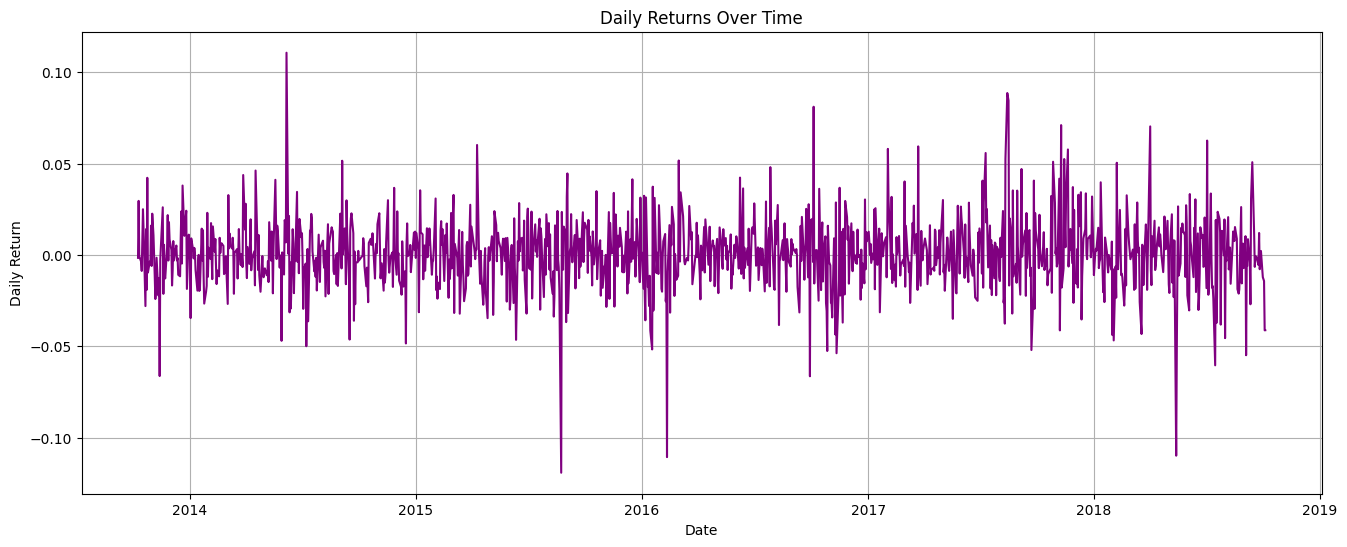

In [17]:
df['Daily_return'] = df['Close'].pct_change()

plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['Daily_return'], color='purple')
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()

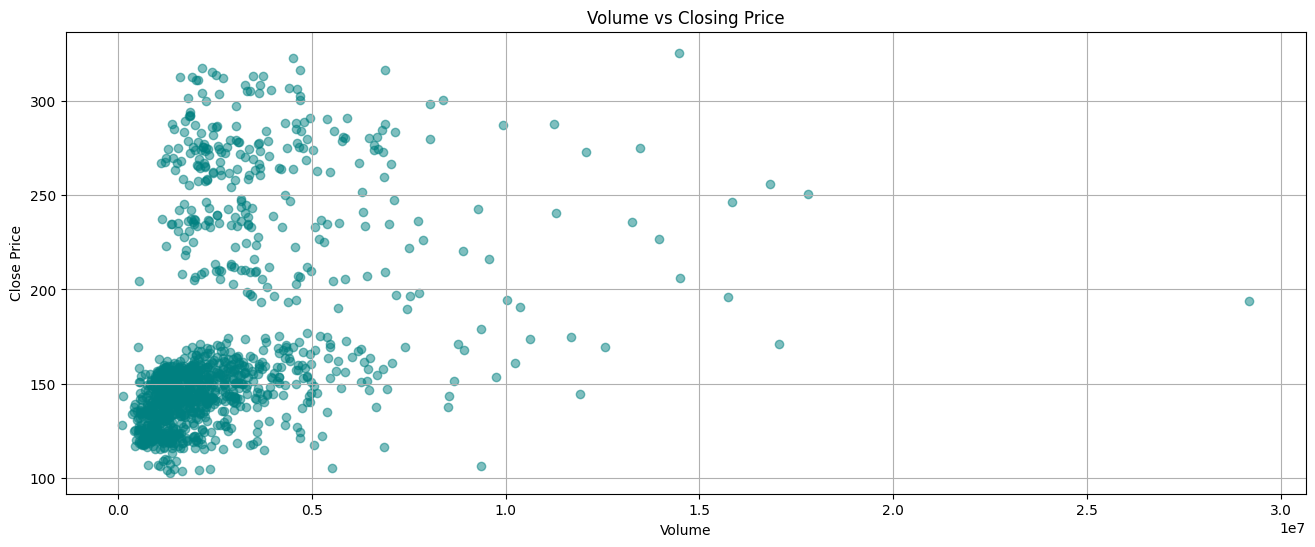

In [18]:
plt.figure(figsize=(16,6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='teal')
plt.title("Volume vs Closing Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

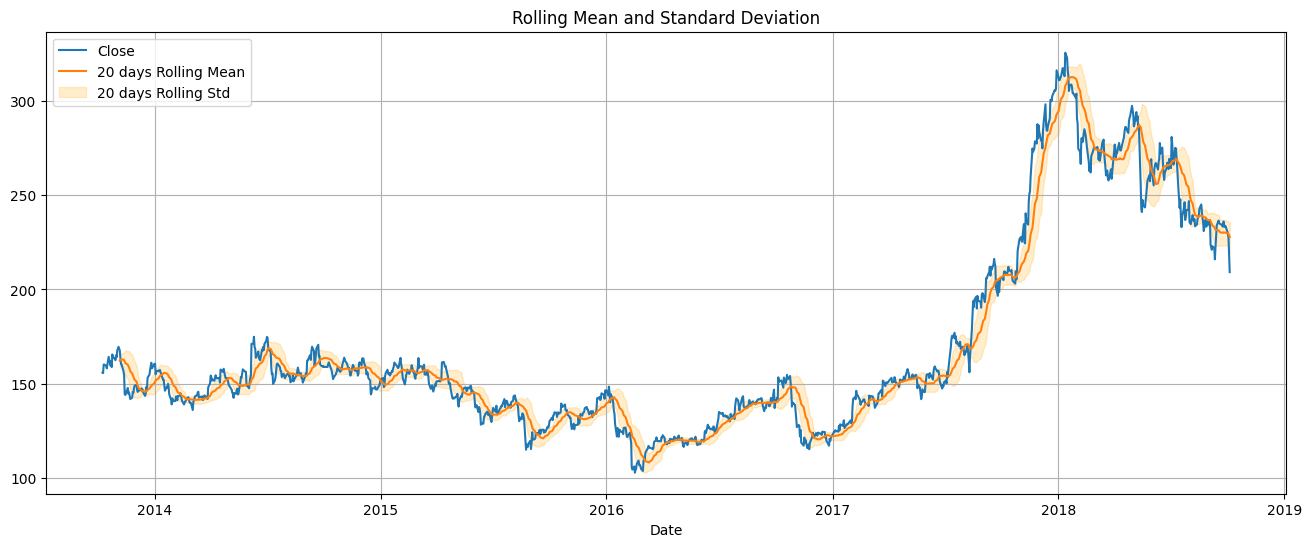

In [19]:
df['rolling_mean_20'] = df['Close'].rolling(20).mean()
df['rolling_std_20'] = df['Close'].rolling(20).std()

plt.figure(figsize=(16,6))
plt.plot(df['Date'] , df['Close'], label='Close')
plt.plot(df['Date'], df['rolling_mean_20'], label='20 days Rolling Mean')
plt.fill_between(df['Date'],
                 df['rolling_mean_20'] - df['rolling_std_20'],
                 df['rolling_mean_20'] + df['rolling_std_20'],
                 color='orange', alpha=0.2, label='20 days Rolling Std')
plt.title("Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

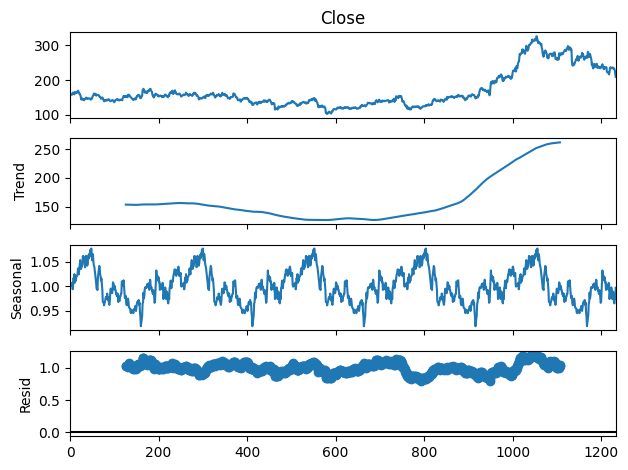

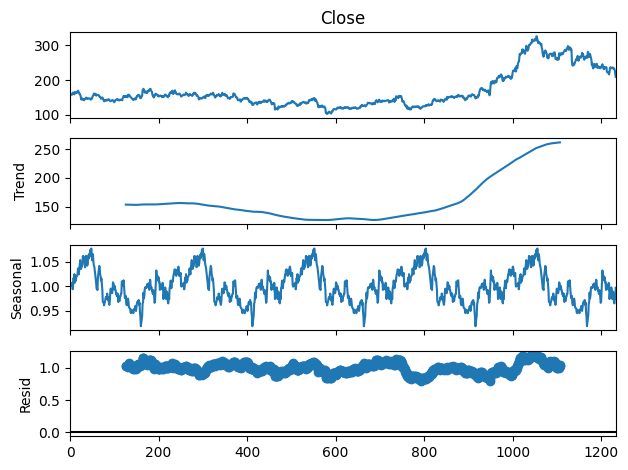

In [20]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)
decomposition.plot()


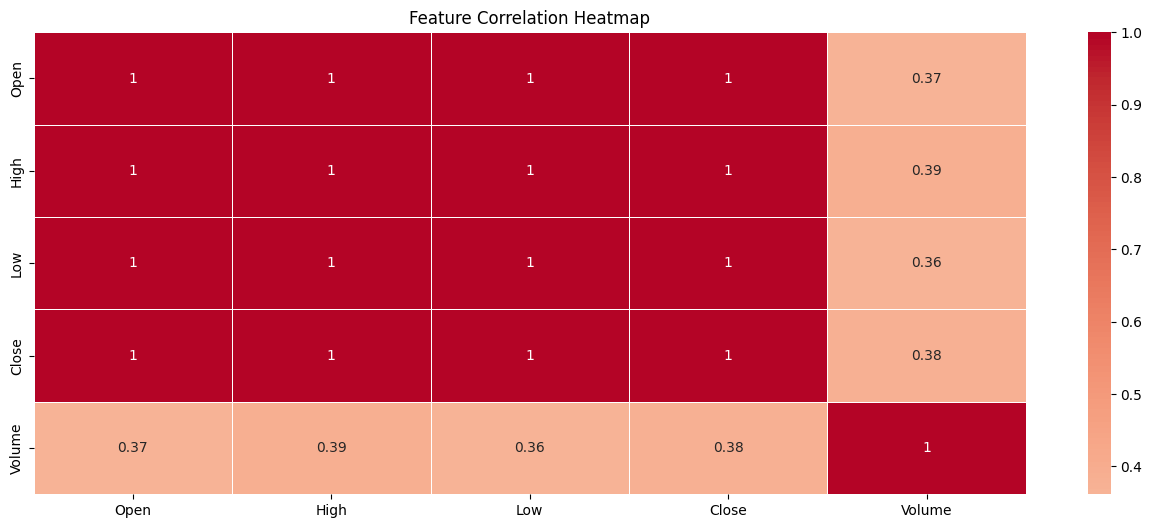

In [21]:
numeric_df= df[['Open', 'High', 'Low', 'Close', 'Volume']]

corr = numeric_df.corr()

plt.figure(figsize=(16,6))
sns.heatmap(data= corr ,annot=True,center=0,cmap='coolwarm',linewidth=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [22]:
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.998974,0.998776,0.997711,0.367157
High,0.998974,1.000000,0.998738,0.999161,0.388369
Low,0.998776,0.998738,1.000000,0.999068,0.361325
Close,0.997711,0.999161,0.999068,1.000000,0.380396
Volume,0.367157,0.388369,0.361325,0.380396,1.000000


# **Technical Indicators**

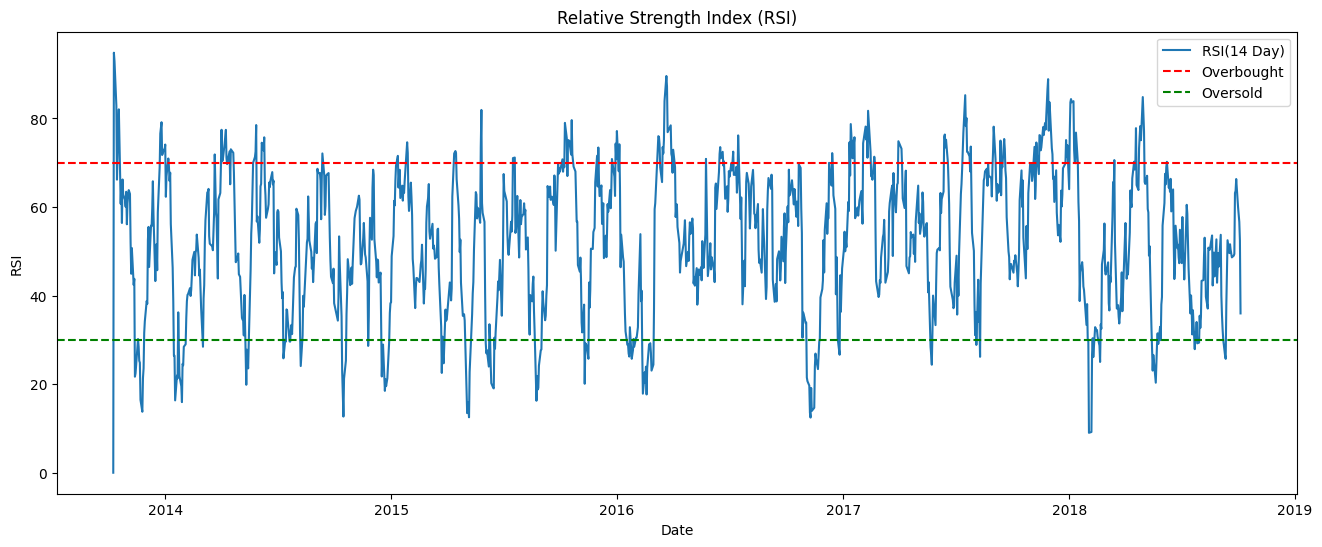

In [23]:
#RSI
df = df.reset_index()

df['Change'] = df['Close'].diff()

df['Gains'] = df['Change'].where(df['Change'] > 0,0)
df['Loss'] = -df['Change'].where(df['Change'] < 0,0)

window=14
df['AvgGain'] = df['Gains'].rolling(window=window, min_periods=1).mean()
df['AvgLoss'] = df['Loss'].rolling(window=window, min_periods=1).mean()

df['RS'] = df['AvgGain'] / df['AvgLoss']
df['RSI'] = 100 - ( 100 / ( 1 + df['RS']))

plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['RSI'], label='RSI(14 Day)')
plt.axhline(70,color='red',linestyle='--',label='Overbought')
plt.axhline(30,color='Green',linestyle='--',label='Oversold')
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()

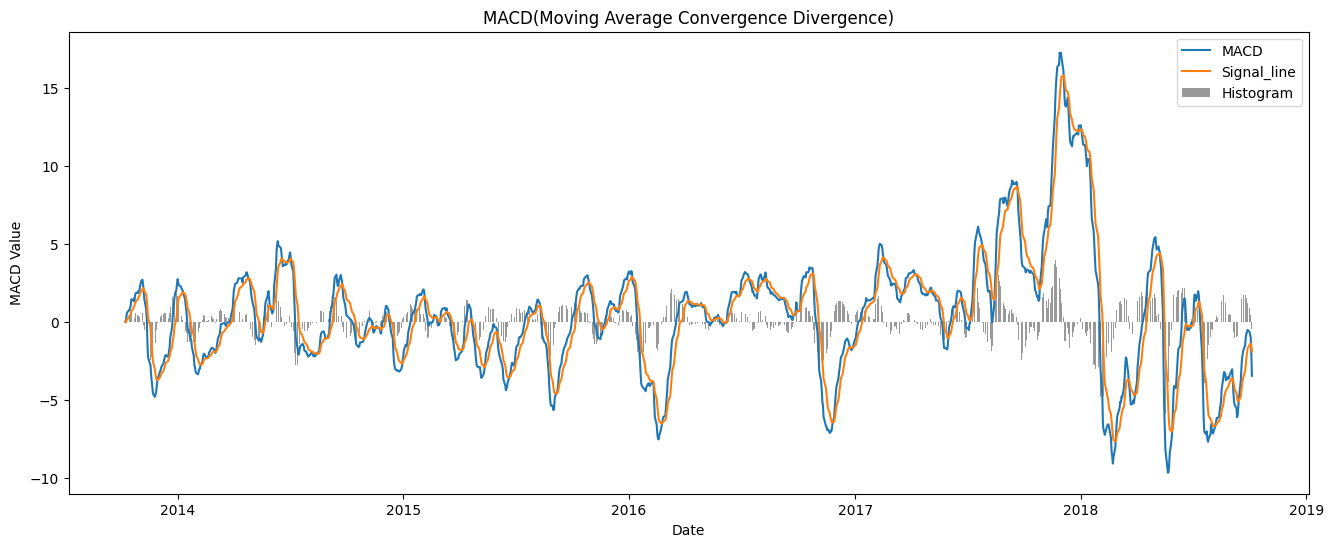

In [24]:
#MACD
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = df['EMA12'] - df['EMA26']

df['Signal_line'] = df['MACD'].ewm(span=9, adjust=False).mean()

df['Histogram'] = df['MACD'] - df['Signal_line']

plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.plot(df['Date'], df['Signal_line'], label='Signal_line')
plt.bar(df['Date'], df['Histogram'], label='Histogram', color='gray', alpha=0.8)
plt.title('MACD(Moving Average Convergence Divergence)')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()

In [25]:
df

,index,Date,Open,High,Low,Close,Volume,Target,SMA_7,SMA_30,...,Loss,AvgGain,AvgLoss,RS,RSI,EMA12,EMA26,MACD,Signal_line,Histogram
0,0,2013-10-08,157.00,157.80,155.20,155.80,1720413.0,155.55,NaN,NaN,...,-0.00,0.000000,-0.000000,NaN,NaN,155.800000,155.800000,0.000000,0.000000,0.000000
1,1,2013-10-09,155.70,158.20,154.15,155.55,2049580.0,160.15,NaN,NaN,...,0.25,0.000000,0.125000,0.000000,0.000000,155.761538,155.781481,-0.019943,-0.003989,-0.015954
2,2,2013-10-10,156.00,160.80,155.85,160.15,3124853.0,160.05,NaN,NaN,...,-0.00,1.533333,0.083333,18.400000,94.845361,156.436686,156.105075,0.331611,0.063131,0.268480
3,3,2013-10-11,161.15,163.45,159.00,160.05,1880046.0,159.45,NaN,NaN,...,0.10,1.150000,0.087500,13.142857,92.929293,156.992581,156.397292,0.595289,0.169563,0.425726
4,4,2013-10-14,160.85,161.45,157.70,159.45,1281419.0,158.05,NaN,NaN,...,0.60,0.920000,0.190000,4.842105,82.882883,157.370645,156.623419,0.747227,0.285096,0.462131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,2018-09-28,234.05,235.95,230.20,233.75,3069914.0,230.90,234.307143,232.683333,...,-0.00,1.842857,0.935714,1.969466,66.323907,232.754417,233.269825,-0.515408,-1.708757,1.193349
1230,1230,2018-10-01,234.55,234.60,221.05,230.90,1534749.0,227.60,233.735714,232.461667,...,2.85,1.707143,1.139286,1.498433,59.974906,232.469122,233.094282,-0.625160,-1.492038,0.866878
1231,1231,2018-10-03,230.00,237.50,225.75,227.60,1708590.0,218.20,232.735714,232.070000,...,3.30,1.707143,1.307143,1.306011,56.635071,231.720027,232.687298,-0.967272,-1.387084,0.419813
1232,1232,2018-10-04,223.50,227.80,216.15,218.20,1728786.0,209.20,230.578571,231.243333,...,9.40,1.707143,1.550000,1.101382,52.412281,229.640023,231.614165,-1.974143,-1.504496,-0.469647


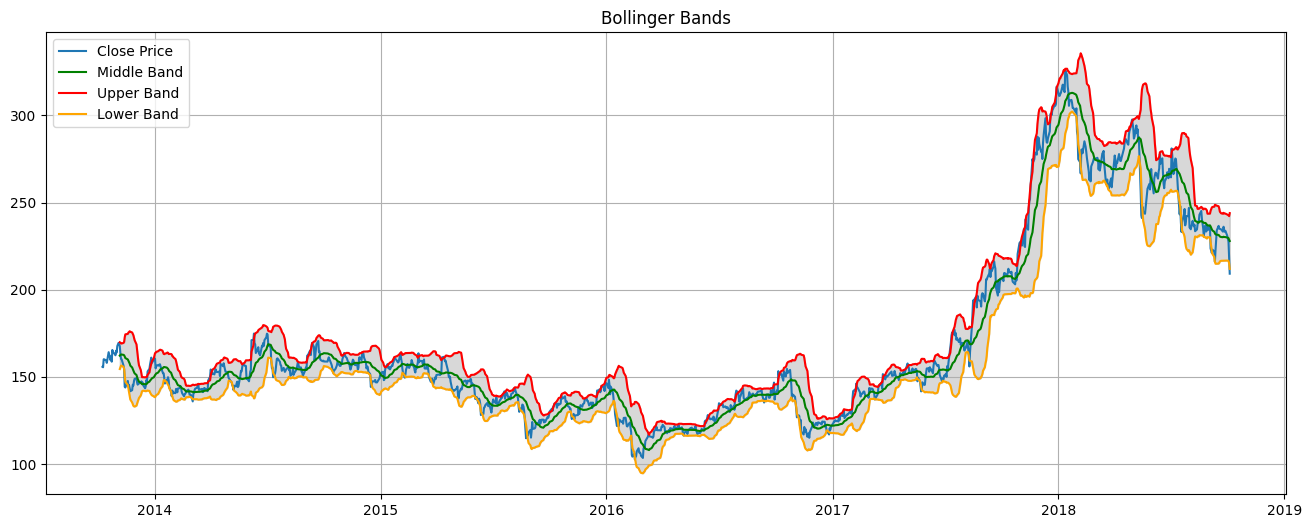

In [26]:
#Bollinger Bands
window=20

df['Middle_Band'] = df['Close'].rolling(window).mean()
df['Upper_Band'] = df['Middle_Band'] +  2 * df['Close'].rolling(window=20).std()
df['Lower_Band'] = df["Middle_Band"] -  2 * df['Close'].rolling(window=20).std()

plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Middle_Band'], label='Middle Band', color='green')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band', color='red')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band', color='orange')
plt.fill_between(df['Date'], df['Upper_Band'], df['Lower_Band'], color='gray',alpha=0.3)
plt.title('Bollinger Bands')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)

In [28]:
df['Daily_Return'] = df['Close'].pct_change()

In [29]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Target,SMA_7,SMA_30,...,MACD,Signal_line,Histogram,Middle_Band,Upper_Band,Lower_Band,Close_Lag1,Close_Lag2,Close_Lag3,Daily_Return
0,0,2013-10-08,157.00,157.80,155.20,155.80,1720413.0,155.55,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-10-09,155.70,158.20,154.15,155.55,2049580.0,160.15,NaN,NaN,...,-0.019943,-0.003989,-0.015954,NaN,NaN,NaN,155.80,NaN,NaN,-0.001605
2,2,2013-10-10,156.00,160.80,155.85,160.15,3124853.0,160.05,NaN,NaN,...,0.331611,0.063131,0.268480,NaN,NaN,NaN,155.55,155.80,NaN,0.029572
3,3,2013-10-11,161.15,163.45,159.00,160.05,1880046.0,159.45,NaN,NaN,...,0.595289,0.169563,0.425726,NaN,NaN,NaN,160.15,155.55,155.80,-0.000624
4,4,2013-10-14,160.85,161.45,157.70,159.45,1281419.0,158.05,NaN,NaN,...,0.747227,0.285096,0.462131,NaN,NaN,NaN,160.05,160.15,155.55,-0.003749


In [30]:
df.dropna(inplace=True)
df

,index,Date,Open,High,Low,Close,Volume,Target,SMA_7,SMA_30,...,MACD,Signal_line,Histogram,Middle_Band,Upper_Band,Lower_Band,Close_Lag1,Close_Lag2,Close_Lag3,Daily_Return
29,29,2013-11-20,146.25,147.80,144.75,145.35,2756146.0,143.65,148.135714,158.838333,...,-3.784255,-1.513579,-2.270676,158.4225,175.736853,141.108147,144.55,147.70,143.95,0.005534
30,30,2013-11-21,145.10,146.80,143.10,143.65,2997918.0,141.80,146.292857,158.433333,...,-4.178211,-2.046506,-2.131706,157.6675,176.196035,139.138965,145.35,144.55,147.70,-0.011696
31,31,2013-11-22,144.35,145.20,141.10,141.80,2315264.0,142.40,144.471429,157.975000,...,-4.586830,-2.554570,-2.032259,156.4850,175.918831,137.051169,143.65,145.35,144.55,-0.012879
32,32,2013-11-25,142.55,143.75,140.80,142.40,2305892.0,145.50,144.200000,157.383333,...,-4.806838,-3.005024,-1.801814,155.4125,175.491761,135.333239,141.80,143.65,145.35,0.004231
33,33,2013-11-26,142.00,146.80,141.60,145.50,2505101.0,145.05,144.421429,156.898333,...,-4.677136,-3.339446,-1.337690,154.5250,174.714458,134.335542,142.40,141.80,143.65,0.021770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,2018-09-28,234.05,235.95,230.20,233.75,3069914.0,230.90,234.307143,232.683333,...,-0.515408,-1.708757,1.193349,230.1750,243.635801,216.714199,233.25,234.25,236.10,0.002144
1230,1230,2018-10-01,234.55,234.60,221.05,230.90,1534749.0,227.60,233.735714,232.461667,...,-0.625160,-1.492038,0.866878,229.9200,243.106612,216.733388,233.75,233.25,234.25,-0.012193
1231,1231,2018-10-03,230.00,237.50,225.75,227.60,1708590.0,218.20,232.735714,232.070000,...,-0.967272,-1.387084,0.419813,229.5850,242.642891,216.527109,230.90,233.75,233.25,-0.014292
1232,1232,2018-10-04,223.50,227.80,216.15,218.20,1728786.0,209.20,230.578571,231.243333,...,-1.974143,-1.504496,-0.469647,228.6600,242.207561,215.112439,227.60,230.90,233.75,-0.041301


In [31]:
df['Volume'] = np.log1p(df['Volume'])  # reduces huge volume differences


Text(0, 0.5, 'Volatility')

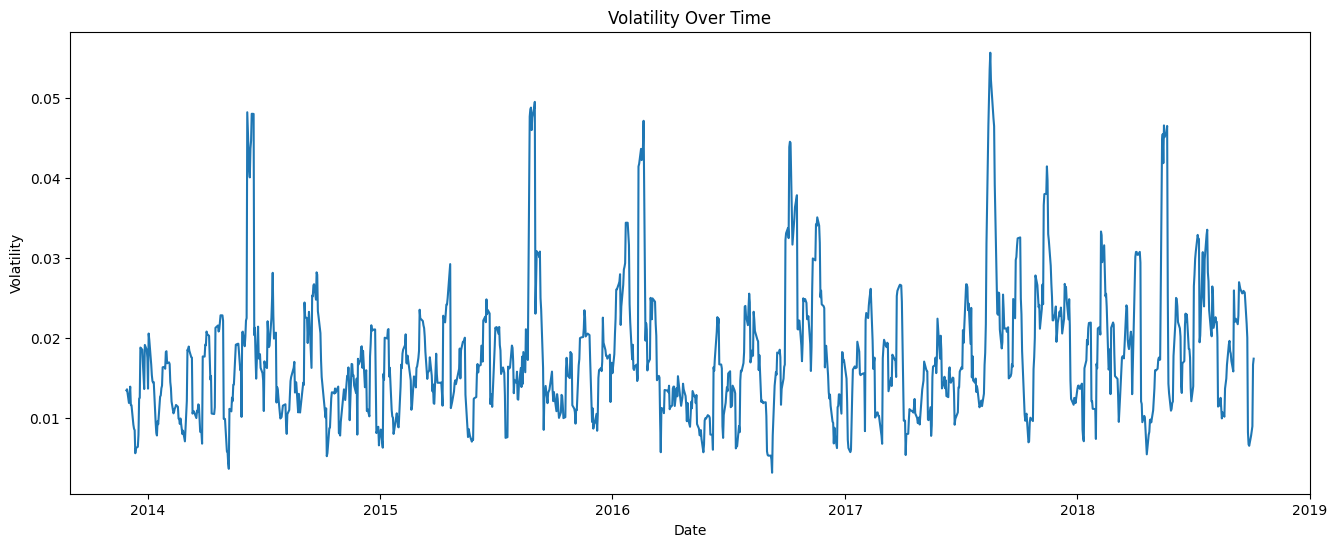

In [32]:
df['Volatility_7'] = df['Daily_Return'].rolling(window=7).std()

plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['Volatility_7'], label='7-Day Volatility')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')

In [33]:
df['Target'] = df['Close'].shift(-1)

df.dropna(inplace=True)

In [34]:
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.9.0 seaborn==0.13.2 \
scipy==1.13.0 statsmodels==0.14.2 pmdarima==2.0.4 scikit-learn==1.5.0 \
xgboost==2.0.3 tensorflow==2.16.1 plotly==5.22.0 yfinance==0.2.40 prophet==1.1.5


In [35]:
!pip uninstall -y numpy pandas statsmodels pmdarima


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: statsmodels 0.14.2
Uninstalling statsmodels-0.14.2:
  Successfully uninstalled statsmodels-0.14.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4


In [36]:
pip install numpy==1.26.4 pandas==2.2.2 statsmodels==0.14.2 pmdarima==2.0.4


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached statsmodels-0.14.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached statsmodels-0.14.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the 

In [37]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import  auto_arima

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fec48366a20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


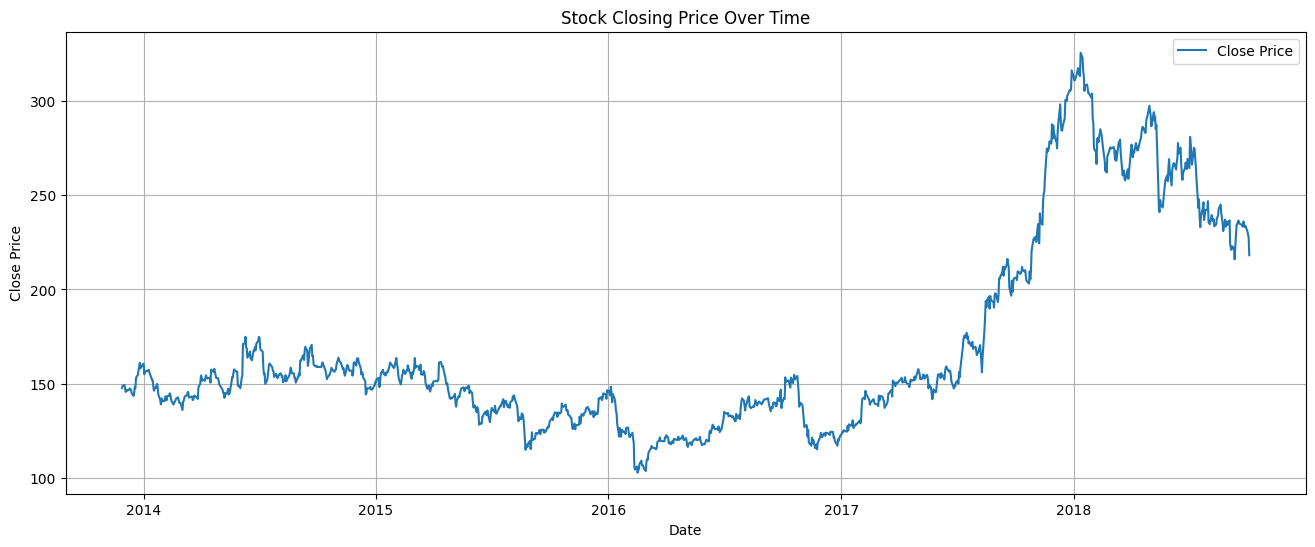

In [38]:
ts = df['Close']
ts.index = pd.to_datetime(df['Date'])
ts = ts.sort_index()
ts

plt.figure(figsize=(16,6))
plt.plot(ts, label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
results = adfuller(ts)
print("ADF statistics",results[0])
print("P-Value",results[1])

ADF statistics -0.9232067597488322
P-Value 0.7802340717521077


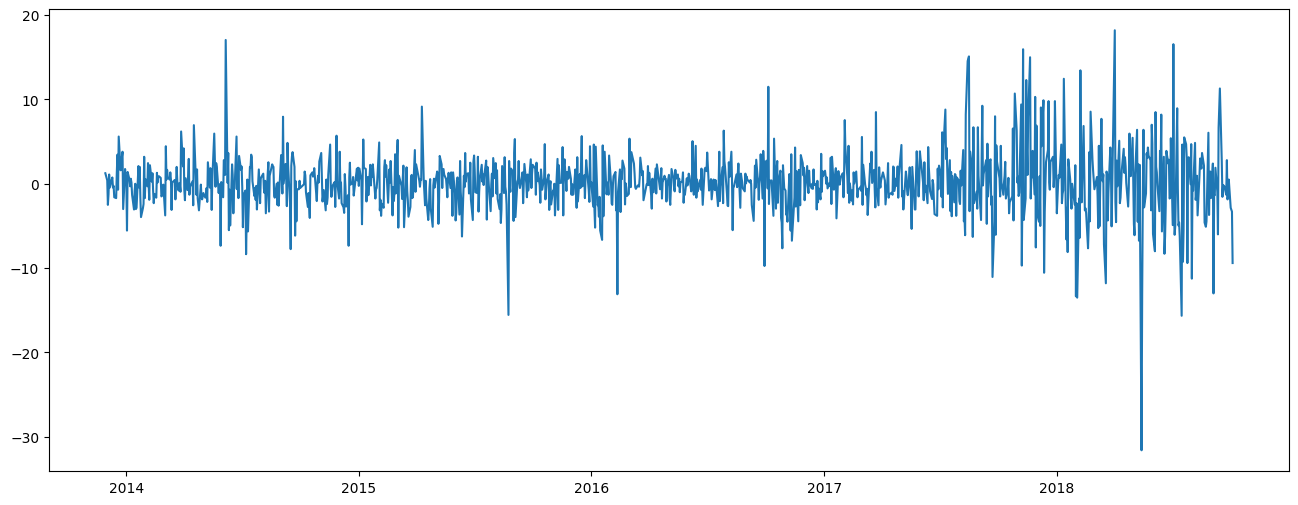

ADF Statistics -9.014017258922129
P-Value 6.0183848960868394e-15


In [40]:
ts_diff=ts.diff().dropna()

plt.figure(figsize=(16,6))
plt.plot(ts_diff)
plt.show()

results_diff = adfuller(ts_diff)
print("ADF Statistics",results_diff[0])
print("P-Value",results_diff[1])

In [41]:
stepwise_fit = auto_arima(ts,
                          start_p=1, start_q=1,
                          max_p=5, max_q=5,
                          m=1,
                          d=None,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True
                          )
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6466.825, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6462.826, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6464.764, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6464.766, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6461.148, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.263 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1198
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3229.574
Date:                Tue, 28 Oct 2025   AIC                           6461.148
Time:                        17:47:09   BIC                           6466.236
Sample:                             0   HQIC                          6463.065
                               - 1198                                       

ARIMA Mean Absolute Error:54.97
Root Mean Squared Error:61.23
R2 Score:-4.0342


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


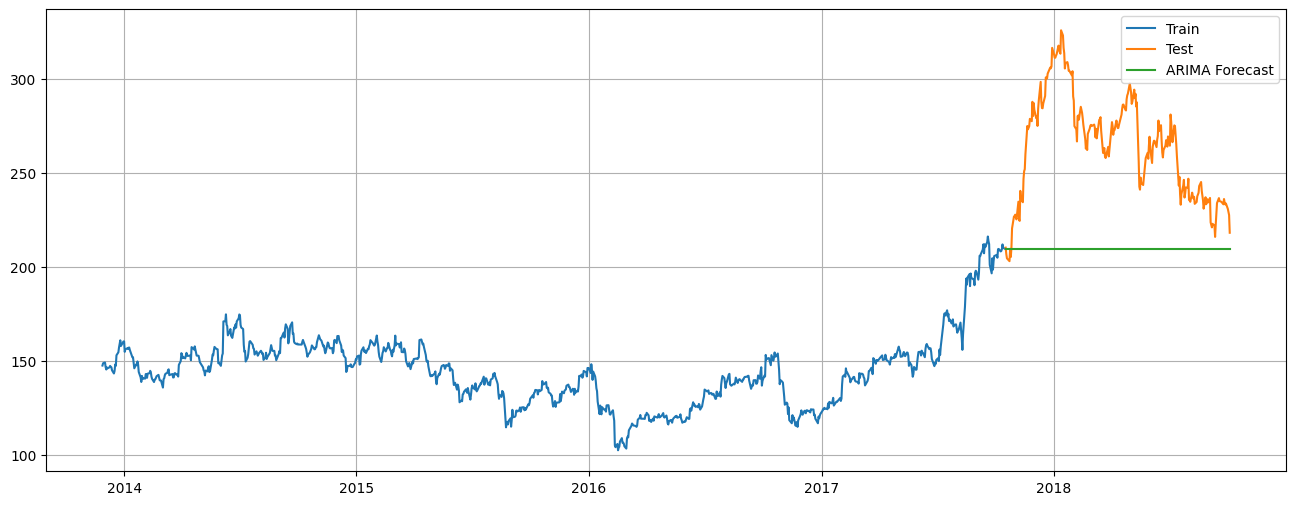

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

train = int(len(ts) * 0.8)
train, test = ts[:train], ts[train:]

order = stepwise_fit.order
arima_model = ARIMA(train, order=order)
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=len(test))

mae_ar = mean_absolute_error(test,arima_forecast)
rmse_ar = np.sqrt(mean_squared_error(test, arima_forecast))
r2_ar = r2_score(test, arima_forecast)

print(f"ARIMA Mean Absolute Error:{mae_ar:.2f}")
print(f"Root Mean Squared Error:{rmse_ar:.2f}")
print(f"R2 Score:{r2_ar:.4f}")

plt.figure(figsize=(16,6))
plt.plot(train.index,train,label='Train')
plt.plot(test.index,test,label='Test')
plt.plot(test.index, arima_forecast,label='ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
df_prophet = df[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})

train_size = int(len(df_prophet) * 0.8)
train_prophet = df_prophet.iloc[: train_size]
test_prophet = df_prophet.iloc[train_size :]

In [44]:
# Uninstall conflicting packages
!pip uninstall -y prophet fbprophet cmdstanpy pystan

Found existing installation: prophet 1.1.5
Uninstalling prophet-1.1.5:
  Successfully uninstalled prophet-1.1.5
Found existing installation: cmdstanpy 1.2.0
Uninstalling cmdstanpy-1.2.0:
  Successfully uninstalled cmdstanpy-1.2.0


In [45]:
# Install the recommended version of Prophet and its dependencies
!pip install prophet==1.1.5 cmdstanpy==1.2.0

  Using cached prophet-1.1.5-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
  Using cached cmdstanpy-1.2.0-py3-none-any.whl.metadata (3.9 kB)
Using cached prophet-1.1.5-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.4 MB)
Using cached cmdstanpy-1.2.0-py3-none-any.whl (93 kB)


In [46]:
from prophet import Prophet

model = Prophet(
    daily_seasonality = False,
    weekly_seasonality = True,
    yearly_seasonality = True,
    changepoint_prior_scale=0.5,
    seasonality_mode='multiplicative'
)

model.fit(train_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe4z8238v/40fiqzdf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe4z8238v/3jnmurh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85469', 'data', 'file=/tmp/tmpe4z8238v/40fiqzdf.json', 'init=/tmp/tmpe4z8238v/3jnmurh7.json', 'output', 'file=/tmp/tmpe4z8238v/prophet_modelfwqi1muq/prophet_model-20251028174723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [47]:
future = model.make_future_dataframe(periods = len(test_prophet),freq='B')
forecast = model.predict(future)


In [48]:
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
1193,2018-09-11,324.458529,112.663849,554.282197,318.747600,113.511803,541.580107
1194,2018-09-12,325.344921,111.725438,557.856449,319.076420,111.897815,543.206431
1195,2018-09-13,325.477005,112.933575,557.147693,319.405240,110.194961,545.479937
1196,2018-09-14,326.156520,109.839142,561.152303,319.734060,108.492106,547.753443
1197,2018-09-17,326.619946,111.246170,565.709677,320.720519,107.902599,550.684589


In [49]:
from prophet.plot import plot_plotly, plot_components_plotly

plt = plot_plotly(model, forecast)
plt.show()

In [50]:
forecast_df = forecast[['ds', 'yhat']].set_index('ds')
test_df = test_prophet.set_index('ds')

common_dates = forecast_df.index.intersection(test_df.index)
print(common_dates)
pred_prophet = forecast_df.loc[common_dates,'yhat']
actual_test = test_df.loc[common_dates,'y']
print(f'pred_prophet{pred_prophet}, actual_test{actual_test}')
mae_prophet=mean_absolute_error(actual_test,pred_prophet)
rmse_prophet=np.sqrt(mean_squared_error(actual_test,pred_prophet))
r2_prophet=r2_score(actual_test,pred_prophet)

print(f'Mean Absolute Error:{mae_prophet:.2f}')
print(f'RMSE:{rmse_prophet:.2f}')
print(f'R2 Score:{r2_prophet:.4f}')

DatetimeIndex(['2017-10-17', '2017-10-18', '2017-10-19', '2017-10-23',
               '2017-10-24', '2017-10-25', '2017-10-26', '2017-10-27',
               '2017-10-30', '2017-10-31',
               ...
               '2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-14', '2018-09-17'],
              dtype='datetime64[ns]', name='ds', length=229, freq=None)
pred_prophetds
2017-10-17    220.961347
2017-10-18    221.922582
2017-10-19    222.377265
2017-10-23    224.348975
2017-10-24    224.427829
                 ...    
2018-09-10    323.935961
2018-09-11    324.458529
2018-09-12    325.344921
2018-09-14    326.156520
2018-09-17    326.619946
Name: yhat, Length: 229, dtype: float64, actual_testds
2017-10-17    210.30
2017-10-18    206.80
2017-10-19    204.60
2017-10-23    203.10
2017-10-24    209.65
               ...  
2018-09-10    222.00
2018-09-11    216.00
2018-09-12    222.65
2018

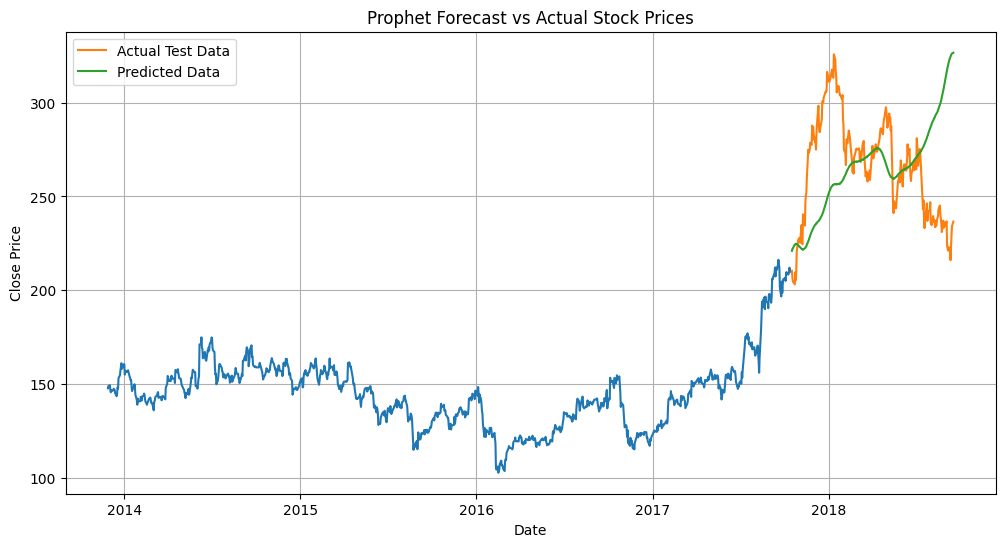

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train_prophet['ds'], train_prophet['y'])
plt.plot(actual_test.index,actual_test.values,label='Actual Test Data')
plt.plot(pred_prophet.index, pred_prophet.values, label='Predicted Data')
plt.title('Prophet Forecast vs Actual Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.legend()
plt.show()

In [52]:
features = [
    'Open','High','Low','Volume',
    'SMA_7','SMA_30','EMA',
    'Close_Lag1','Close_Lag2','Close_Lag3',
    'Daily_Return','Volatility_7','Upper_Band',
    'Lower_Band','Middle_Band'
]

X = df[features]
y = df['Target']

In [53]:
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred_lr = model.predict(X_test)

In [56]:
mae_lr = mean_absolute_error(y_test ,y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Absolute Error :{mae_lr:.2f}")
print(f"Root Mean Squared error:{rmse_lr:.2f}")
print(f"R2 Score:{r2_lr:.4f}")

Mean Absolute Error :5.00
Root Mean Squared error:6.69
R2 Score:0.9400


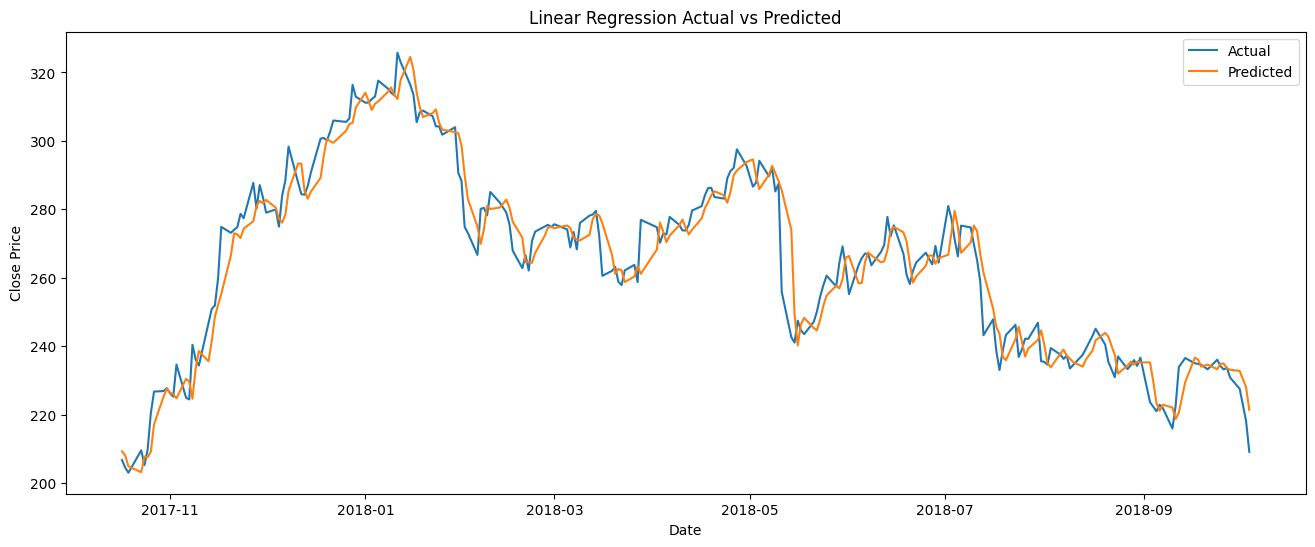

In [57]:
plt.figure(figsize=(16,6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label = "Actual")
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_lr, label="Predicted")
plt.title("Linear Regression Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [58]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

rf = RandomForestRegressor(
    n_estimators = 300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

xgb = xgb.XGBRegressor(
    n_estimators = 300,
    learning_rate=0.05,
    max_depth=5,
    subsamploe = 0.8,
    random_state = 42,
    n_jobs=-1
)

In [59]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

Mean Absolute Error:57.73
Root Mean Squared Error:63.77
R2 Score:-4.4566


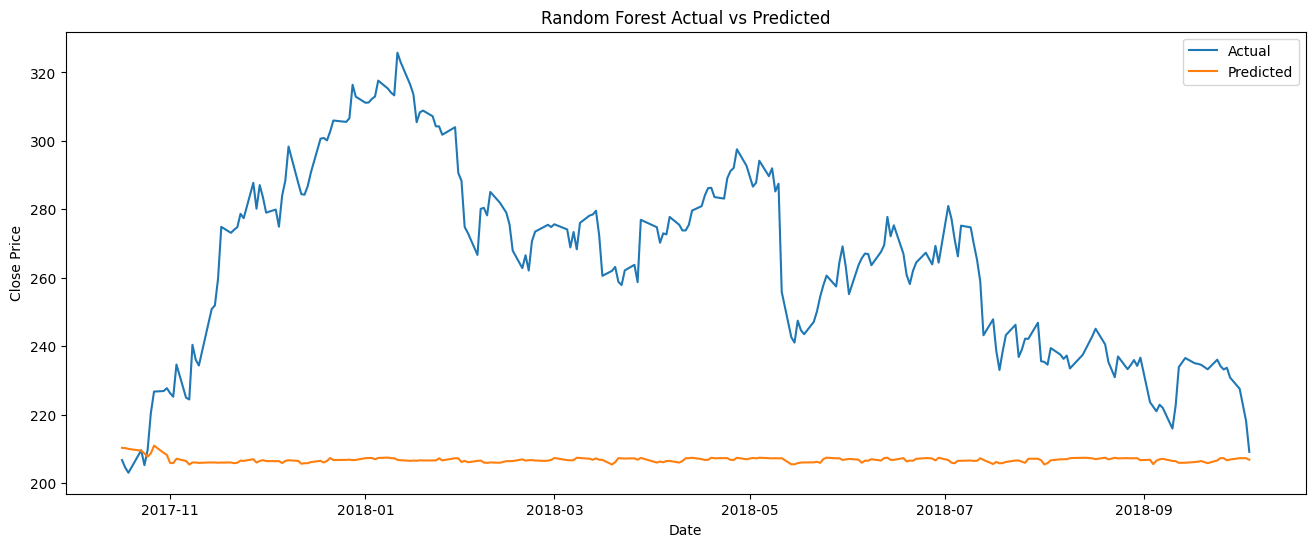

In [60]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error:{mae_rf:.2f}")
print(f"Root Mean Squared Error:{rmse_rf:.2f}")
print(f"R2 Score:{r2_rf:.4f}")

plt.figure(figsize=(16,6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label = "Actual")
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_rf,label = "Predicted")
plt.title("Random Forest Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

Mean Absolute Error:66.96
Root Mean Squared Error:72.56
R2 Score:-6.0644


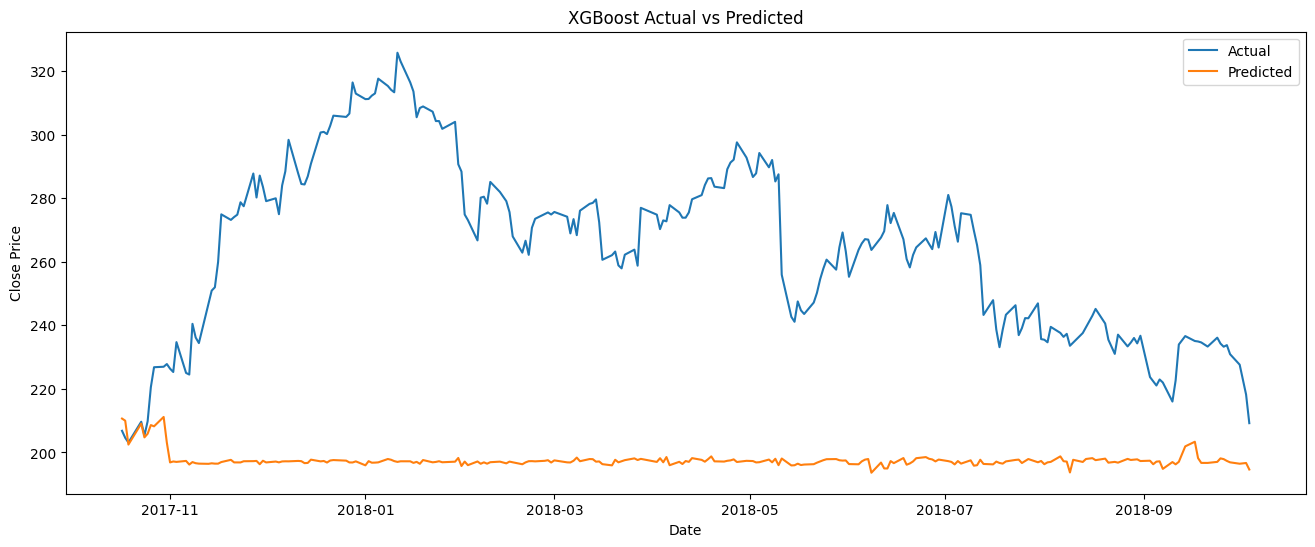

In [61]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error:{mae_xgb:.2f}")
print(f"Root Mean Squared Error:{rmse_xgb:.2f}")
print(f"R2 Score:{r2_xgb:.4f}")

plt.figure(figsize=(16,6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label = "Actual")
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_xgb,label = "Predicted")
plt.title("XGBoost Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

In [62]:
!pip install --upgrade ml_dtypes==0.5.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.2 MB/s eta 0:00:00
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.5.0 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.16.1 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.16.1 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.16.1 which is incom

In [63]:
from sklearn.preprocessing import MinMaxScaler

data = df[['Date', 'Close']].copy()
data.set_index('Date', inplace=True)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))

In [64]:

time_step = 60

X_data, y_data = [], []
for i in range(time_step, len(scaled_data)):
  X_data.append(scaled_data[i-time_step:i, 0])
  y_data.append(scaled_data[i, 0])

In [65]:
X_data, y_data = np.array(X_data), np.array(y_data)

In [66]:
train_size = int(len(X_data) * 0.8)
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]


In [67]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True,input_shape=(60,1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50,return_sequences=False))
lstm_model.add(Dropout((0.2)))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test,y_test),
    batch_size=32,
    verbose=1,
)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 0.0105 - val_loss: 0.0080
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - loss: 0.0016 - val_loss: 0.0086
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - loss: 0.0011 - val_loss: 0.0057
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - loss: 0.0010 - val_loss: 0.0142
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 8.7891e-04 - val_loss: 0.0029
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 8.2355e-04 - val_loss: 0.0055
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms

In [70]:
y_pred_lstm = lstm_model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


In [71]:
y_predicted = scaler.inverse_transform(y_pred_lstm)
y_actual = scaler.inverse_transform(y_test.reshape(-1,1))

Mean Absolute Error:6.73
Root Mean Squared Error:9.04
R2 Score:0.8729


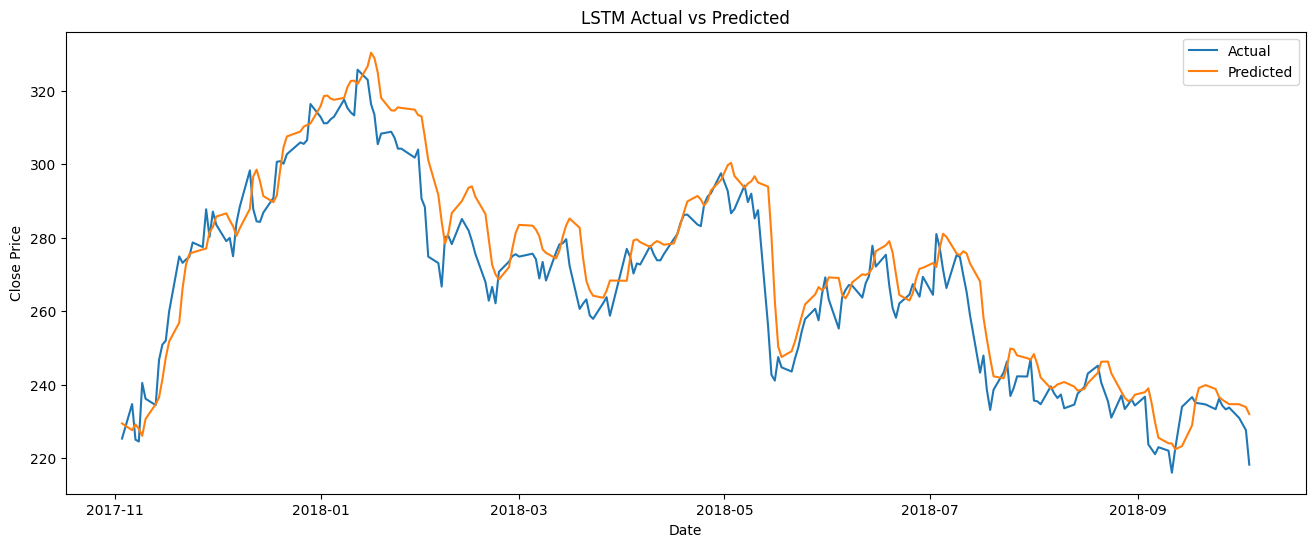

In [72]:
mae_lstm = mean_absolute_error(y_actual, y_predicted)
rmse_lstm = np.sqrt(mean_squared_error(y_actual, y_predicted))
r2_lstm = r2_score(y_actual, y_predicted)

print(f"Mean Absolute Error:{mae_lstm:.2f}")
print(f"Root Mean Squared Error:{rmse_lstm:.2f}")
print(f"R2 Score:{r2_lstm:.4f}")

plt.figure(figsize=(16,6))
plt.plot(df['Date'].iloc[-len(y_actual):], y_actual, label = "Actual")
plt.plot(df['Date'].iloc[-len(y_actual):], y_predicted,label = "Predicted")
plt.title("LSTM Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [73]:
direction_actual = np.sign(y_actual[1:] - y_actual[:-1])
direction_predicted = np.sign(y_predicted[1:] - y_predicted[:-1])

direction_accuracy = np.mean(direction_actual == direction_predicted) * 100
print(f"Directional Accuracy {direction_accuracy:.2f}")

Directional Accuracy 49.78


In [74]:
#GRU
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(60,1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam',loss = 'mean_squared_error' )
gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history_gru = gru_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0202 - val_loss: 0.0351
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 8.5339e-04 - val_loss: 0.0016
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 7.8041e-04 - val_loss: 0.0017
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 9.2711e-04 - val_loss: 0.0021
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 8.0369e-04 - val_loss: 0.0014
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - loss: 6.5775e-04 - val_loss: 0.0014
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - loss: 6.5729e-04 - val_loss: 0.0013
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━

In [76]:
y_pred_gru = gru_model.predict(X_test)

y_predicted_gru = scaler.inverse_transform(y_pred_gru)
y_actual_gru = scaler.inverse_transform(y_test.reshape(-1,1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


Mean Absolute Error:0.02
Root Mean Squared Error:0.03
R2 Score:0.9424


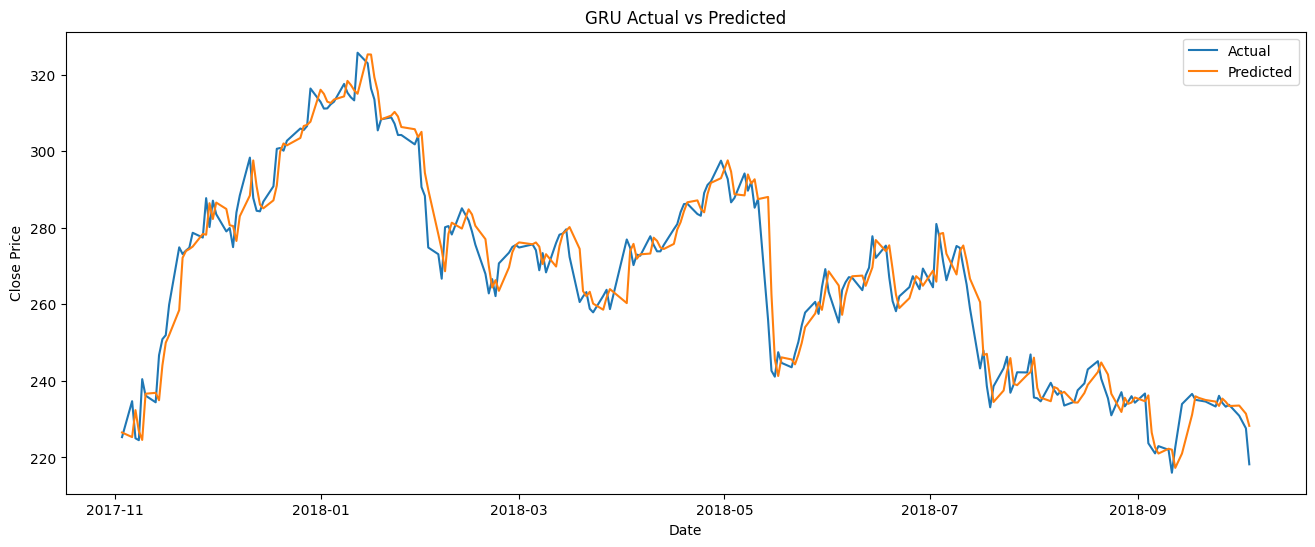

In [77]:
mae_gru = mean_absolute_error(y_test, y_pred_gru)
rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
r2_gru = r2_score(y_test, y_pred_gru)

print(f"Mean Absolute Error:{mae_gru:.2f}")
print(f"Root Mean Squared Error:{rmse_gru:.2f}")
print(f"R2 Score:{r2_gru:.4f}")

plt.figure(figsize=(16,6))
plt.plot(df['Date'].iloc[-len(y_actual):], y_actual_gru, label = "Actual")
plt.plot(df['Date'].iloc[-len(y_actual):], y_predicted_gru,label = "Predicted")
plt.title("GRU Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [78]:
direction_actual_gru = np.sign(y_actual_gru[1:] - y_actual_gru[:-1])
direction_predicted_gru = np.sign(y_predicted_gru[1:] - y_predicted_gru[:-1])

direction_accuracy_gru = np.mean(direction_actual_gru == direction_predicted_gru) * 100
print(f"Directional Accuracy of GRU {direction_accuracy_gru:.2f}")

Directional Accuracy of GRU 47.58


In [79]:

results = pd.DataFrame([
    ['Linear Regression', mae_lr, rmse_lr, r2_lr],
    ['Random Forest', mae_rf, rmse_rf, r2_rf],
    ['XGBoost', mae_xgb, rmse_xgb, r2_xgb],
    ['ARIMA', mae_ar,rmse_ar,r2_ar],
    ['Prophet', mae_prophet,rmse_prophet,r2_prophet],
    ['LSTM', mae_lstm,rmse_lstm,r2_lstm],
    ['GRU',mae_gru,rmse_gru,r2_gru]
], columns=['Model', 'MAE', 'RMSE', 'R2'])

print(results)

results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
results_df.to_csv('results.csv', index=False)

               Model        MAE       RMSE        R2
0  Linear Regression   5.003303   6.685395  0.940031
1      Random Forest  57.733068  63.770707 -4.456557
2            XGBoost  66.957757  72.560485 -6.064421
3              ARIMA  54.969375  61.232361 -4.034198
4            Prophet  29.499357  39.723787 -1.172069
5               LSTM   6.733778   9.040947  0.872874
6                GRU   0.019922   0.027278  0.942399


In [80]:
results_df = results_df.sort_values(by='RMSE')
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,MAE,RMSE,R2
0,GRU,0.019922,0.027278,0.942399
1,Linear Regression,5.003303,6.685395,0.940031
2,LSTM,6.733778,9.040947,0.872874
3,Prophet,29.499357,39.723787,-1.172069
4,ARIMA,54.969375,61.232361,-4.034198
5,Random Forest,57.733068,63.770707,-4.456557
6,XGBoost,66.957757,72.560485,-6.064421


In [81]:
results_df.to_csv('Model_Comparison_results.csv', index=False)

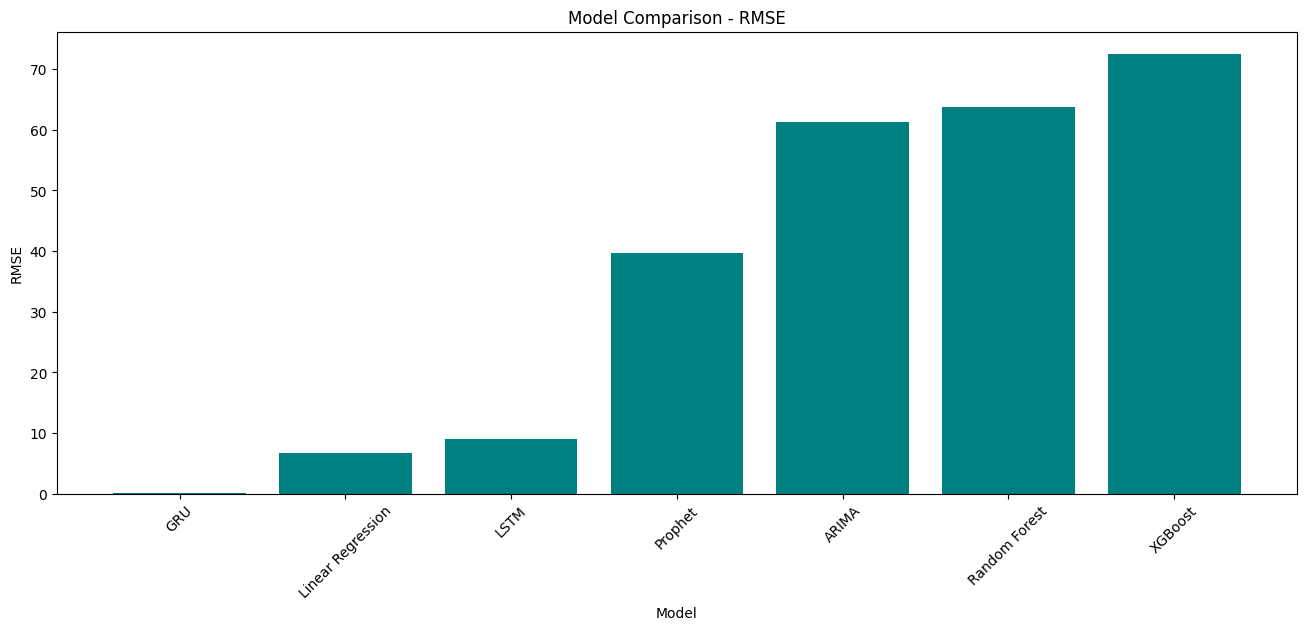

In [82]:
plt.figure(figsize=(16,6))
plt.bar(results_df['Model'], results_df['RMSE'], color='teal')
plt.title('Model Comparison - RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.show()

In [85]:
# after training in Colab
import joblib
# suppose rf and xgb are trained sklearn/XGBoost regressors, and scaler is a fitted StandardScaler/MinMaxScaler
joblib.dump(model,"lr_model.pkl")
joblib.dump(rf, "rf_model.pkl")
joblib.dump(xgb, "xgb_model.pkl")
joblib.dump(scaler, "scaler_ml.pkl")   # scaler used for ML features

['scaler_ml.pkl']

In [86]:
# after training
lstm_model.save("lstm_model.h5")
gru_model.save("gru_model.h5")

# Also save the scaler you used for DL (MinMaxScaler)
joblib.dump(scaler, "scaler_dl.pkl")  # scaler_dl was used to scale Close values for sequence models

['scaler_dl.pkl']

In [87]:
from google.colab import files
files.download("lr_model.pkl")
files.download("rf_model.pkl")
files.download("xgb_model.pkl")
files.download("lstm_model.h5")
files.download("scaler_ml.pkl")
files.download("scaler_dl.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
files.download("gru_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>